In [45]:
#Vamos importar os módulos que precisamos
from cmath import *
from numpy import linalg
import numpy as np

In [46]:
Ufonte = 10
R1 = 1    
R2 = 1
L1 = 10e-3
L2 = 10e-3
C1 = 1e-9
C2 = 1e-9
K = 0.5

In [47]:
def CalcularTransformador(Uf, Rc,Freq):
    XL1 = 1j * 2*pi*Freq*L1
    XL2 = 1j * 2*pi*Freq*L2
    XM = 1j * 2*pi*Freq * K * sqrt(L1*L2)
    XC1 = 1/(1j * 2*pi*Freq*C1)
    XC2 = 1/(1j * 2*pi*Freq*C2)
    Rpara = ((Rc*XC2)/ (Rc+XC2))
    Z=np.array([[R1+XL1+XC1, -XM],[-XM, R2+XL2+ Rpara ]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)

    v2 = i[1] * Rpara
    return i[0], i[1], v2

In [48]:
Rcarga = 300
i1, i2,v2 = CalcularTransformador(Ufonte, Rcarga,60)

print('Com resistor na saída de %.2f Ω:' %Rcarga)
print('i1 (eficaz) = %.2f A' %np.abs(i1))
print('i2 (eficaz) = %.2f A' %np.abs(i2))
print('V1 (eficaz): %.2f V' %Ufonte)
print('V2 (eficaz): %.2f V' %(np.abs(i2*Rcarga)))

print('Relação N1/N2: %.2f' %(np.abs(sqrt(L1/L2))))
print('Relação i2/i1: %.2f' %(np.abs(i2)/np.abs(i1)))
print('Relação V1/V2: %.2f' %(np.abs(Ufonte)/np.abs(i2*Rcarga)))




Com resistor na saída de 300.00 Ω:
i1 (eficaz) = 0.00 A
i2 (eficaz) = 0.00 A
V1 (eficaz): 10.00 V
V2 (eficaz): 0.00 V
Relação N1/N2: 1.00
Relação i2/i1: 0.01
Relação V1/V2: 1412036.19


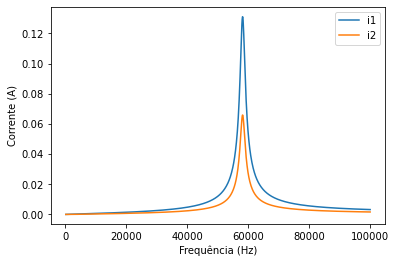

In [49]:
freq = np.linspace(100,100000,1000)
i1 = []
i2 = []
for f in freq:
    i_1  = CalcularTransformador(Ufonte, Rcarga,f)[0]
    i_2  = CalcularTransformador(Ufonte, Rcarga,f)[1]
    i1.append(abs(i_1))
    i2.append(abs(i_2))

import matplotlib.pyplot as plt
plt.plot(freq,i1)
plt.plot(freq,i2)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Corrente (A)')
plt.legend(['i1','i2'])
plt.show()
